## Figure 6: White Acceptance Rate Panel DiD Event Study Estimates

from White Flight in Higher Education? The Case of Hispanic-Serving Institutions

by Laura Hamilton, Charlie Eaton, and Simon Cheng

In [1]:
qui {
    use data/hsi_ca_tx_applications, clear

    drop if lnWhite_app==. | lnpopulationwh==.
   
   drop hispserveyear
    gen hispserveyear=year if hispserve==1
   bysort unitid: egen hispserveyearall=min(hispserveyear)
gen treated=0
replace treated=1 if year>=hispserveyearall
    drop if year>2019 | year<2000
    bysort unitid: egen maxyear=max(year)
bysort unitid: egen minyear=min(year)
    gen missingpanel=.
    bysort unitid (year): replace missingpanel=1 if year[_n-1]!=year-1
    replace missingpanel=. if year==2000
    bysort unitid: egen missingpanelall=min(missingpanel)
    replace missingpanelall=1 if maxyear!=2019 | minyear !=2000
    
    bysort unitid: egen alwaystreated=min(treated)
bysort unitid: egen evertreated=max(treated)

}

In [2]:
drop if alwaystreated==1
drop if missingpanelall==1

(375 observations deleted)
(67 observations deleted)


In [3]:
egen gvar=csgvar(treated), tvar(year) ivar(unitid)

In [4]:
gen white_adm_rt=White_admit / White_app

(20 missing values generated)


In [5]:
tab year if white_adm_rt!=.


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2000 |         42        5.12        5.12
       2001 |         42        5.12       10.24
       2002 |         42        5.12       15.37
       2003 |         42        5.12       20.49
       2004 |         42        5.12       25.61
       2005 |         42        5.12       30.73
       2006 |         42        5.12       35.85
       2007 |         42        5.12       40.98
       2008 |         42        5.12       46.10
       2009 |         42        5.12       51.22
       2010 |         42        5.12       56.34
       2011 |         42        5.12       61.46
       2012 |         42        5.12       66.59
       2013 |         42        5.12       71.71
       2014 |         42        5.12       76.83
       2015 |         42        5.12       81.95
       2016 |         42        5.12       87.07
       2017 |         42        5.12       92.20
       2018 |      

Panel is not balanced
Will use observations with Pair balanced (observed at t0 and t1)
..................................................
..................................................
.............x....................................
..................................................
........x..................x
Difference-in-difference with Multiple Time Periods

                                                           Number of obs = 820
Outcome model  : regression adjustment
Treatment model: none
------------------------------------------------------------------------------
             | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         ATT |   .0064709   .0402105     0.16   0.872    -.0723403    .0852821
------------------------------------------------------------------------------
Control: Never Treated

See Callaway and Sant'Anna (2021) for details


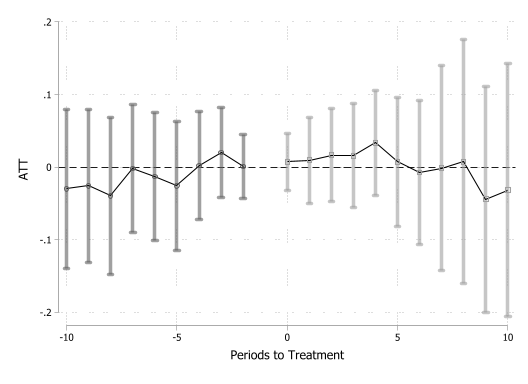

In [6]:
csdid white_adm_rt lnpop* lncpop*, ivar(unitid) time(year) gvar(gvar) ///
        method(reg) agg(simple) long2
qui csdid_estat event, window(-9 10)
csdid_plot, style(rcap) scheme(plotplain) ///
legend(off)

In [8]:
graph export figures/f6_event_white_admissions.pdf, replace

file figures/f6_event_white_admissions.pdf saved as PDF format
